## OPEN + EXPLORE the image from the EXI instrument on the HOPE MISSION to MARS
### Using the ASTROPY Library
#### Image - L2A image most recent from the EMIRS data website 
https://sdc.emiratesmarsmission.ae/data/science?data_level=exi.l2a&latest=latest


In [1]:
from astropy.io import fits
from astropy.table import Table

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.backends.backend_pdf

import seaborn as sns

import math

import glob

In [96]:
# Path of the input fits file that contains the image data
# Insert the filepath to access the file 
filepath = '/scratch/da99/marsatm/emm/data/exi/l2a/xos1/2022/01/'
single_file = filepath + 'emm_exi_l2a_20220101T012601_0154_xos1_f635_f_v06-02.fits.gz'
single_file

'/scratch/da99/marsatm/emm/data/exi/l2a/xos1/2022/01/emm_exi_l2a_20220101T012601_0154_xos1_f635_f_v06-02.fits.gz'

In [97]:
# Read a single file and store the information required

with fits.open(single_file) as hdul:
    header = hdul[0].header 
    data1 = hdul[1].data
    data = hdul['SCI'].data
    solarIncA = hdul['INA'].data
    solflux = hdul[0].header['SOLFLUX']
    convrad = hdul[0].header['CONVRAD']
    xposure = hdul[0].header['XPOSURE']
    heights = hdul['HEIGHT'].data
    

In [98]:
# print the info 
hdul.info()

Filename: /scratch/da99/marsatm/emm/data/exi/l2a/xos1/2022/01/emm_exi_l2a_20220101T012601_0154_xos1_f635_f_v06-02.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     103   ()      
  1  SCI           1 ImageHDU        14   (2048, 1536)   float32   
  2  DQF           1 ImageHDU        23   (2048, 1536)   int16 (rescales to uint16)   
  3  ANC           1 BinTableHDU    256   1R x 82C   [I, I, I, I, I, I, I, I, I, I, I, I, I, I, J, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, J, J, J, J, J, J, J, I, I, I, I, I, J, I, I, I, I, I, I, I, I, I, I, I, I, I, J, J, J, J, I]   
  4  GEOCON        1 BinTableHDU     85   1R x 24C   [D, 3E, 3E, 3E, I, I, 2E, 4E, 9E, 9E, 9E, 3E, 3E, 3E, 3E, 3E, 3E, 3E, 3E, 8A, 7A, 12A, L, 3E]   
  5  PHA           1 ImageHDU        14   (2048, 1536)   int16 (rescales to float32)   
  6  LOOK          1 ImageHDU        13   (2048, 1536)   int16 (resca

In [88]:
# Explore the data
data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

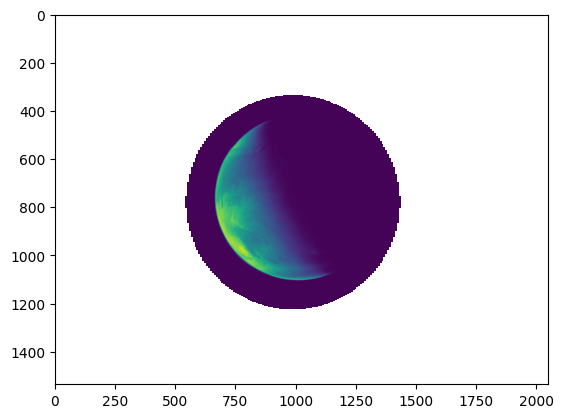

In [99]:
# Plot the data
plt.imshow(data)

In [89]:
# Explore Header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'CU/LASP EMM/EXI ITF'                                                 
TELESCOP= 'EMM     '                                                            
INSTRUME= 'EXI     '                                                            
FILENAME= 'emm_exi_l1_20220101T012601_0154_xos1_f635_n_v06-01'                  
DATE    = '2022-06-25T17:05:24.63' / File processing time                       
PIPE_VER= '1.5     '                                                            
DATE-OBS= '2022-01-01T01:26:01.78' / Observation UTC SCET                       
SCLK    = '0693836461:37849'   / Observation spacecraft clock timestamp         
MARSYEAR=                   

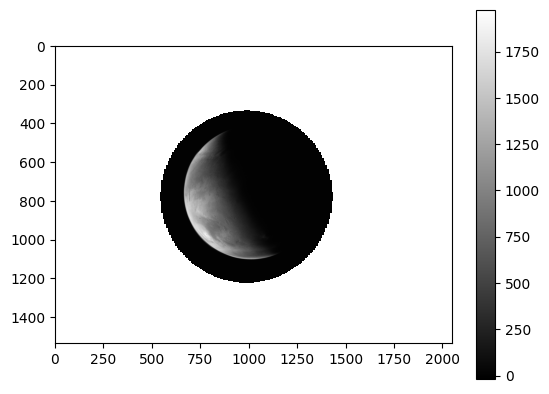

In [90]:
# Display data in grayscale

plt.imshow(data, cmap='gray')
plt.colorbar()


In [91]:
from matplotlib.colors import LogNorm

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

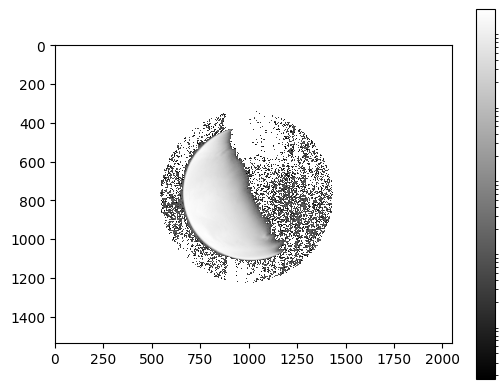

In [92]:
# Display the image with lognorm scaling
plt.imshow(data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [62]:
# Calculate the albedo and display
# print all variables
solarIncA

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [63]:
solflux

0.68827

In [64]:
convrad

1.8898e-07

In [65]:
xposure

0.00463797722

In [66]:
heights

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [67]:
# First step to calculate albedo
rad = (data * convrad)/xposure
rad

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [68]:
# second step
cos_v = np.cos(np.deg2rad(solarIncA))
cos_v

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [70]:
# Final Step
albedo = (np.pi*rad)/(solflux*np.abs(cos_v))
albedo

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [71]:
# plot albedo and display
alb_arr_valid_2d = np.copy(albedo)

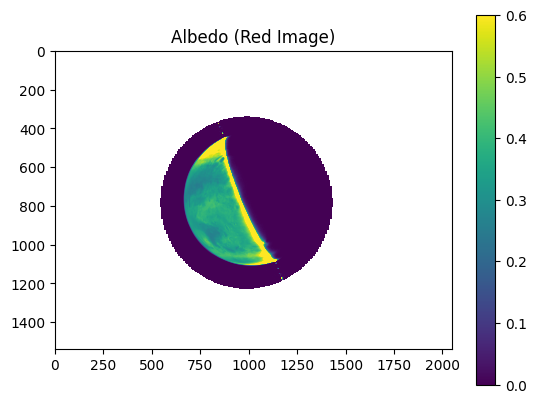

In [79]:
plt.title("Albedo (Red Image)")
plt.imshow(albedo, vmin = 0.0, vmax = 0.6)
plt.colorbar()

In [100]:

alb_arr_valid_2d[(alb_arr_valid_2d > 1) | (alb_arr_valid_2d < 0.0)] = np.nan

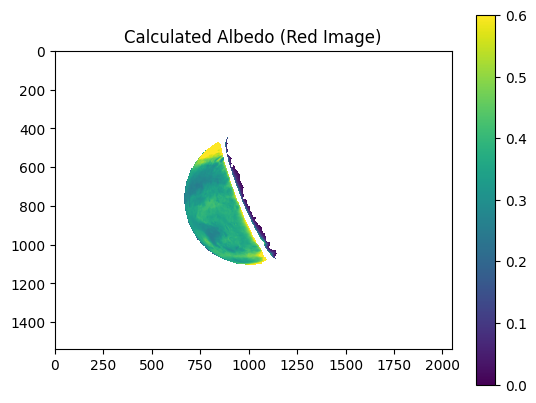

In [101]:
plt.title("Calculated Albedo (Red Image)")
plt.imshow(alb_arr_valid_2d, vmin = 0.0, vmax = 0.6)
plt.colorbar()

In [102]:
# Plot histogram

alb_arr = albedo.flatten()
alb_arr_valid = alb_arr[(alb_arr <1) & (alb_arr >= 0)]

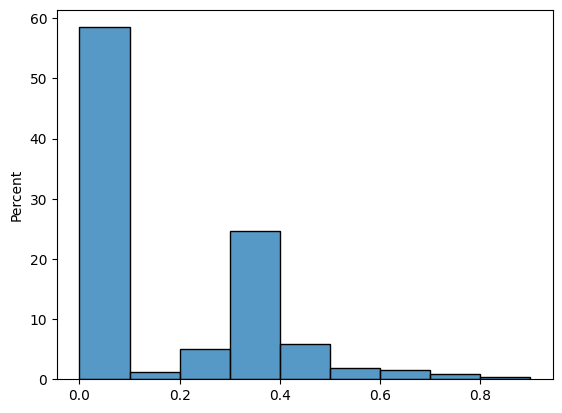

In [103]:
sns.histplot(alb_arr_valid, bins = np.arange(0, 1, 0.1), stat = 'percent')
plt.show()   